[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/porterjenkins/byu-cs474/blob/master/lab1_pytorch_intro.ipynb)

# Deep Learning Part 1: PyTorch, Autodifferentiation, and Optimization

---

While these labs can be completed on your own computer using Jupyter, we suggest using Google Colab. Colab provides a standardized virtual environment and allows you to request a GPU, which will let you perform deep learning much faster. If you choose to do these labs on your own computer, you may have to do extra work in getting your CUDA-compatible GPU working and getting the right versions of the packages for the labs.

We won't use GPUs for this lab, but it will be vital to speed up training in some of the future labs.

# Preface: Jupyter Notebooks

All of your labs will utilize jupyter notebooks, which are useful tools, but they have one big side effect: hidden states. Jupyter notebooks store the state of an executed cell, which can spell problems if you are not careful. To see what we mean execute cell 1 and cell 2.

In [5]:
# cell 1
x = 0

In [6]:
# cell 2
x += 1

Now print `x` below and validate that it equals 1.

In [7]:
x

1

Now execute cell 2 again and print `x` below

In [8]:
x

1

This time `x` equals 2, which makes sense because we incremented it twice, but if an outsider looked at this code sequentially it would seem weird that x prints out 1 and 2. Since the state is hidden, an outsider can't assume code cells are run in sequential order, or that the cells weren't edited after being run.

Jupyter notebooks are great for development: letting you quickly iterate on a program without executing everything sequentially, but at some point you may run into an issue with hidden state.

There are two ways to reset the hidden state in this example. The quickest would be to execute cell 1 again which would reset `x` back to 0. Then if you execute cell 2 and print `x` twice with the two statements below, they should both output 1.

To fully reset the state, just restart your Jupyter notebook runtime/session. This erases all data in RAM, but keeps anything stored on disk (installs, datasets, etc.). When you disconnect from the session in Colab, it deletes everything except for what is saved in your notebook file: code, text, and outputs.

---

# What is PyTorch and Automatic Differentiation

In [9]:
import torch

## Part 1: Tensors and Array Operations

Some of you may already be familiar with NumPy or vector math and so this should be a simple and brief overview.

PyTorch tries to be as close to NumPy as possible.

### Tensor creation, shapes, and data types

Tensors are n-dimensional containers: 0D tensors are scalars, 1D tensors are vectors, and 2D tensors are matrices. We'll often work with tensors with more than 2 dimensions.

Let start by creating a simple tensor.
Pass in the array `[1, 2]` into the `torch.tensor()` function and store the tensor as variable `v`.

In [10]:
v = torch.tensor([1, 2])

Let us look at shape and data type of `v`.
You can view the shape of `v` with `v.shape` or calling `v.size()` and you can look at the data type of `v` with `v.dtype`.

Print the shape and data type of `v` below.

In [11]:
v.shape

torch.Size([2])

We see that that the shape of `v.shape = torch.Size([2])` and its dtype is `torch.int64`.

Initialize a new tensor `w` with the following array `[[1.0], [2.0]]` and print out its shape and dtype.

In [12]:
w = torch.tensor([[1.0], [2.0]])

This time our tensor has a shape of `torch.Size([2, 1])` and its dtype is `torch.float32`.

Let's now change `v` to look like `w`.
First we will try to make `v` share the same shape as `w`. `v` has 1 dimension and `w` has 2.
Both `v` and `w` have a value of 2 in dimension 0 (using 0-based indexing) and `w` has a value of 1 in dimension 1.

To add a dimension to `v` we can call the `v.unsqueeze()` function.
It takes in a dimension argument (`dim`) specifying where we want to add the dimension.
Because `v` is missing its dimension 1, specify `1` as the `dim` argument.

*Note: `.unsqueeze()` returns a reshaped tensor and doesn't modify `v`.*

Do not modify `v` and assign the unsqueezed tensor to the `answer` variable.

In [13]:
answer = v.unsqueeze(dim=1) # replace None with your solution

assert answer.shape == w.shape == torch.Size([2, 1])
assert v.shape == torch.Size([2])

Now let's change the `v`'s data type. This easiest method is to call is the `.float()` function.

*Note: Like `.unsqueeze()`, `.float()` returns a new tensor with the specified dtype and doesn't modify `v`*.
Do not modify v and assign the float tensor to the `answer` variable.

In [14]:
answer = v.float() # replace None with your solution

assert answer.dtype == w.dtype == torch.float32
assert v.dtype == torch.int64

Now let's change `w` to look like `v`, but this time let's do it in one line.

First we should change `w`'s dimensions so it matches `v`.
To remove a dimension we can call the `.squeeze()` function and specify the dimension we want to remove.
This will only remove the dimension if it has **value of 1**, if you squeeze a dimension with a value >1, then nothing changes.
If you do not specify a dimension, all dimensions with a value of 1 are removed.
**It is good coding practice to specify the dimension.**

To make `w` share the same dtype as `v` we can use the `.long()` (because a long is a 64-bit integer).

Now convert `w` to have the same shape and dtype as `v`, in 1 line of code. Remember `.squeeze()` and `.long()` returns tensors so you can chain the functions.

In [15]:
answer =  w.squeeze(dim=1).long() # replace None with your solution

assert answer.shape == v.shape == torch.Size([2])
assert answer.dtype == v.dtype == torch.int64

While there are many other dtypes, `torch.float32` and `torch.int64` are the main ones you will encounter.

There are a few other helpful tensor creation functions.

In [16]:
torch.zeros(size=(3, 3)) # returns a 3x3 tensor filled with 0's
torch.ones(2) # returns a tensor with shape (3,) filled with 1's
torch.full((3, 1), fill_value=-1) # returns a tensor with shape (3,) filled with -1's
torch.rand(size=(2, 2)) # returns a 2x2 tensor filled with (uniform) random floats between 0 and 1
torch.randn(size=(2,2)) # returns a 2x2 tensors filled with random floats drawn from a standard normal distribution

torch.zeros_like(v) # returns a tensor with the same shape and dtype as v, but filled with 0's.
# You could similarly call ones_like(), full_like(), rand_like()

tensor([0, 0])

You can also easily create a tensor with a sequence of integers with the `torch.arange()` function. Just like Python's `range()` function you can specify where the sequence should start, end, and the sequence step size.

In [17]:
torch.arange(6) # returns a tensor with shape (6,) containing a sequence from 0 to 6 (exclusive), i.e. [0, 1, 2, 3, 4, 5]
torch.arange(1, 7) # returns a tensor with shape (6,) containing a sequence from 1 to 7 (exclusive), i.e. [1, 2, 3, 4, 5, 6]
torch.arange(1, 7, 2) # returns a tensor with shape (6,) containing sequence [1, 3, 5]

tensor([1, 3, 5])

### Changing shapes

We have explained how you can add or remove dimensions to a tensor with `.unsqueeze()` and `.squeeze()`.
But what if we want reshape a tensor?

Using the `torch.arange()` function, create a tensor, named `x`, containing a sequence from 0 to 12 (exclusive)

In [18]:
x = torch.arange(0, 12) # replace None with your solution

assert x.equal(torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]))

Let's say we want to change our tensor sequence (vector) into a matrix such that: $$\begin{bmatrix} 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 \end{bmatrix} \rightarrow \begin{bmatrix} 0 & 1 & 2 & 3 \\ 4 & 5 & 6 & 7 \\ 8 & 9 & 10 & 11 \end{bmatrix}$$

This matrix has 3 rows and 4 columns, i.e. shape=(3,4), so we can call the `.view()` function and specify the shape we want to view sequence of data.
**Note: `.view()` returns a tensor*. Do **not** overwrite `x`, just print out `x.view(3, 4)` and validate that we get the desired matrix.

In [19]:
x.view(3, 4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Now change the shape of `x` so that: $\begin{bmatrix} 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7& 8 & 9 & 10 & 11 \end{bmatrix} \rightarrow \begin{bmatrix} 0 & 1 & 2 \\ 3 & 4 & 5 \\ 6 & 7 & 8 \\ 9 & 10 & 11 \end{bmatrix}$

In [20]:
x.view(4,3)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

Now change the shape so that we that 2 matrices that are 3 by 2: $$\begin{bmatrix} 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 \end{bmatrix} \rightarrow \begin{bmatrix} \begin{bmatrix} 0 & 1 \\ 2 & 3 \\ 4 & 5 \end{bmatrix} \\ \begin{bmatrix} 6 & 7 \\ 8 & 9 \\ 10 & 11 \end{bmatrix} \end{bmatrix}$$


In [21]:
print(x.view(2, 3, 2))

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]]])


Notice that the memory in all three cases is contiguous, meaning we can count the numbers from left to right and top to bottom, but what if we wanted our tensor to look like:
$$\begin{bmatrix} 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 \end{bmatrix} \rightarrow \begin{bmatrix} 0 & 4 & 8 \\ 1 & 5 & 9 \\ 2 & 6 & 10 \\ 3 & 7 & 11 \end{bmatrix}$$
We can make use of the `.transpose()` function by first making our data sequence into a 3x4 matrix and then calling `.transpose()`:
$$\begin{aligned}
\begin{bmatrix} 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 \end{bmatrix} \rightarrow \begin{bmatrix} 0 & 1 & 2 & 3 \\ 4 & 5 & 6 & 7 \\ 8 & 9 & 10 & 11 \end{bmatrix} \\
\begin{bmatrix} 0 & 1 & 2 & 3 \\ 4 & 5 & 6 & 7 \\ 8 & 9 & 10 & 11 \end{bmatrix}^\textrm{T} \rightarrow \begin{bmatrix} 0 & 4 & 8 \\ 1 & 5 & 9 \\ 2 & 6 & 10 \\ 3 & 7 & 11 \end{bmatrix}
\end{aligned}$$
The `.transpose()` function takes in two arguments, the two dimensions you want to transpose, this is easy in our case since there are only two dimensions (because we only have two dimension you could also use `.T`, which is an alias for `.transpose()` in two dimensions).

Use `.view()` and `.transpose()` and validate your new tensor is correct.

In [22]:
x.view(3, 4).transpose(0,1)

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])

What if we wanted to flatten the above tensor so that:
$$\begin{bmatrix} 0 & 4 & 8 \\ 1 & 5 & 9 \\ 2 & 6 & 10 \\ 3 & 7 & 11 \end{bmatrix} \rightarrow \begin{bmatrix} 0 & 4 & 8 & 1 & 5 & 9 & 2 & 6 & 10 & 3 & 7 & 11 \end{bmatrix}$$

Use the same `.view()` and `.transpose()` functions you used above, but this time tack on `.view(12)` to flatten the matrix.

In [33]:
x.view(3, 4).transpose(0,1).view(12)

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

You should have run into `RuntimeError: view size is not compatible with input tensor's size and stride ...`.
This error was thrown because the transpose messed with the contiguity of our data and `.view()` ensures that our data remains contiguous.
If however, we want to enforce our change, we can call `.reshape()`.
Go ahead and rerun the same line of code above, but this time replace `.view(12)` with `.reshape(12)`.

In [24]:
x.view(3, 4).transpose(0,1).reshape(12)

tensor([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

`.view()` is faster than `.reshape()`, so you use `.reshape()` only when needed.

### Broadcasting and Array Operations

In [25]:
s = torch.tensor(1)
v1 = torch.tensor([1])
v2 = torch.tensor([1, 2])
v3 = torch.tensor([1, 2, 3])
A = torch.tensor([[1, 2],
                  [3, 4]])
B = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

Print out the shape of `s`

In [26]:
s.shape

torch.Size([])

The shape of `s` is `torch.Size([])` because it has no dimensions and is therefore a scalar and so in some cases it will operate different from `v1` which is a vector of size 1.

### Broadcasting

Broadcasting is how array libraries, such as PyTorch and NumPy, perform arithmetic operations on two arrays with different shapes.

There are two main rules to remember:
1. If one array has fewer dimensions than another, then we **prepend** (e.g. `unsqueeze(0)`) dimensions to the smaller array until both arrays have the same number of dimensions.
    ```python
    x.shape == (5, 4, 2)
    y.shape == (2, )
    # After Step 1
    x.shape == (5, 4, 2)
    y.shape == (1, 1, 2)
    ```
2. After Step 1, both arrays must have the same value at each dimension must or one of them must have a value of one. Whenever a dimension of 1 is matched to a dimension >1, it duplicates its data to match the size of the other.
    ```python
    # Example will Fail
    x.shape == (1, 4, 2, 9)
    y.shape == (1, 1, 5, 9)
    Matches:   (T, T, F, T)

    # Example will Pass
    x.shape == (1, 4, 2, 9)
    y.shape == (2, 4, 1, 9)
    Matches:   (T, T, T, T)
    ```

You do not need to implement these rules, they are done automatically, but you need to know them when you are performing operations on two arrays.

Example 1: Adding `A + s`

Because `A.shape == (2, 2)` and `s.shape == ()` then Step 1 prepends 1 to `s` twice so that it has a shape of (1, 1). Then the value of `s` gets copied on the dimensions where it has a value of 1.

<!-- $\begin{aligned}
A + s &= \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} + 1 \\  
\textrm{After Step 1} \\
    &= \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} + \begin{bmatrix} \begin{bmatrix} 1 \end{bmatrix} \end{bmatrix} \\
\textrm{After Step 2} \\
    &= \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} + \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} = \begin{bmatrix} 2 & 3 \\ 4 & 5 \end{bmatrix}
\end{aligned}$ -->

$\begin{aligned}
A + s &= \begin{array}{cc} [[1 & 2]\; \\ \;[3 & 4]] \end{array} + 1 \\  
\textrm{After Step 1} \\
    &= \begin{array}{cc} [[1 & 2]\; \\ \;[3 & 4]] \end{array} + \begin{array}{c} [[1]] \end{array} \\  
\textrm{After Step 2} \\
    &= \begin{array}{cc} [[1 & 2]\; \\ \;[3 & 4]] \end{array} + \begin{array}{c} [[1 & 1]\; \\ \;[1 & 1]] \end{array} = \begin{array}{cc} [[2 & 3]\; \\ \;[4 & 5]] \end{array} \\  
\end{aligned}$

Add `A + s` below and validate you get the correct answer.

In [27]:
A + s


tensor([[2, 3],
        [4, 5]])

*Note, you can get the same result if you add by a float/integer, i.e. `A + 1`. PyTorch works well with floats and integers.*

Example 2: Adding `B + v3`.

Because `B.shape == (2, 3)` and `v3.shape == (3,)` then Step 1 prepends 1 to `v3` once so that it has a shape of (1, 3). Then the value of `v3` gets copied on the dimensions where it has a value of 1.

$\begin{aligned}
B + v_3 &= \begin{array}{ccc} [[1 & 2 & 3]\; \\ \;[4 & 5 & 6]] \end{array} + \begin{array}{ccc} [1 & 2 & 3] \end{array} \\  
\textrm{After Step 1} \\
    &= \begin{array}{ccc} [[1 & 2 & 3]\; \\ \;[4 & 5 & 6]] \end{array} + \begin{array}{ccc} [[1 & 2 & 3]] \end{array} \\  
\textrm{After Step 2} \\
    &= \begin{array}{ccc} [[1 & 2 & 3]\; \\ \;[4 & 5 & 6]] \end{array} + \begin{array}{ccc} [[1 & 2 & 3]\; \\ \;[1 & 2 & 3]] \end{array} = \begin{array}{ccc} [[2 & 4 & 6]\; \\ \;[5 & 7 & 9]] \end{array} \\  
\end{aligned}$

Add `B + v3` below and validate you get the correct answer.

In [30]:
B + v3

tensor([[2, 4, 6],
        [5, 7, 9]])

Example 3: Adding `B + v2`

We want to happen is for:

$\begin{aligned}
B + v_2 &= \begin{array}{ccc} [[1 & 2 & 3]\; \\ \;[4 & 5 & 6]] \end{array} + \begin{array}{cc} [1 & 2] \end{array} \\  
\textrm{After Step 1} \\
    &= \begin{array}{ccc} [[1 & 2 & 3]\; \\ \;[4 & 5 & 6]] \end{array} + \begin{array}{c} [[1]\; \\ \;[2]] \end{array} \\  
\textrm{After Step 2} \\
    &= \begin{array}{ccc} [[1 & 2 & 3]\; \\ \;[4 & 5 & 6]] \end{array} + \begin{array}{c} [[1 & 1 & 1]\; \\ \;[2 & 2 & 2]] \end{array} = \begin{array}{ccc} [[2 & 3 & 4]\; \\ \;[6 & 7 & 8]] \end{array}
\end{aligned}$

Try by first running `B + v2`

In [31]:
B + v2

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

This does not work.
You should have run into the following error `RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1.`

Let's quickly parse this statement. `The size of tensor a`, i.e. `B`, `must match the size of tensor b`, i.e. `v2`, `at dimension 1`.
`B.shape == (2, 3)` and `v2.shape == (2,)` and after Step 1 `v2.shape == (1, 2)`.
Therefore, the value at `B`'s 1st dimension is `(3)` and the value at `v2`'s 1st dimension is `(2)`. Hence the error.

We need to use an `.unsqueeze()` to fix the dimensions of `v2`. Fix the dimensions of `v2` below and validate you get the correct answer: $\begin{array}{ccc} [[2 & 3 & 4]\; \\ \;[6 & 7 & 8]] \end{array}$.


In [32]:
B + v2.unsqueeze(1)

tensor([[2, 3, 4],
        [6, 7, 8]])

### Multiplication Notation
$A \times x$ versus $Ax$

When we use the notation $A \times x$ we mean we are performing elementwise multiplication, and in Python it looks like `A * x`, but if we use notation $Ax$ we mean that we are performing matrix multiplication and in Python it looks like `A @ x`.

### Broadcasting Quiz

In [150]:
a = torch.arange(2)
b = torch.arange(4)
print(a,b)

tensor([0, 1]) tensor([0, 1, 2, 3])


Add `a` and `b` such that: $$\begin{bmatrix} 0 \\ 1 \end{bmatrix} + \begin{bmatrix} 0 & 1 & 2 & 3 \end{bmatrix} = \begin{bmatrix}  0 & 1 & 2 & 3 \\ 1 & 2 & 3 & 4 \end{bmatrix}$$

In [152]:
answer = a.unsqueeze(1) + b # replace None with your solution

assert torch.equal(answer, torch.tensor([[0, 1 , 2, 3], [1, 2, 3, 4]]))

Change `b` into a 2x2 matrix (use `.view()`) multiply with `a` along `b`'s column dimension. $$\begin{bmatrix} 0 & 1 \\ 2 & 3 \end{bmatrix} * \begin{bmatrix} 0 & 1 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 0 & 3 \end{bmatrix}$$

In [153]:
answer  =  b.view(2,2) * a # replace None with your solution

assert torch.equal(answer, torch.tensor([[0, 1], [0, 3]]))

Change `b` into a 2x2 matrix (use `.view()`) multiply with `a` along `b`'s row dimension. $$\begin{bmatrix} 0 & 1 \\ 2 & 3 \end{bmatrix} * \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 & 0 \\ 2 & 3 \end{bmatrix}$$

In [43]:
answer = b.view(2,2) * a.unsqueeze(1) # replace None with your solution

assert torch.equal(answer, torch.tensor([[0, 0], [2, 3]]))

Change `b` into a 2x2 matrix and matrix multiply `a` such that:  $$\begin{bmatrix} 0 & 1 \\ 2 & 3 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 3 \end{bmatrix}$$

In [46]:
answer = (a * b.view(2,2)).sum(dim=1).unsqueeze(1) # replace None with your solution

assert torch.equal(answer, torch.tensor([[1], [3]]))

In [47]:
c = torch.zeros((1, 2))
d = torch.zeros(3)

Add `c` and `d` such that the resulting shape is (1, 3, 2).

In [154]:
answer = (c.unsqueeze(0).repeat(1, 3, 1)) + (d.unsqueeze(0).unsqueeze(-1).repeat(1, 1, 2))
# replace None with your solution
print(answer)

assert answer.shape == torch.Size([1, 3, 2])

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]]])


---

# Automatic Differentiation

PyTorch is a machine learning library that provides us with the ability to automatically differentiate (autodiff) functions. In this section we will explore how we can make use of PyTorch's autodiff functions.

To help us understand a little more about how PyTorch performs autodiff, we are going to import the `make_dot()` function below

In [68]:
!pip install torchviz # `!` signifies a bash operation rather than Python
from torchviz import make_dot

Let's make scalar tensor `x = torch.tensor(2)` to see how PyTorch works.

In [165]:
x = torch.tensor(2)
print(x)

tensor(2)


We have already talked about two important properties that a tensor has: `.shape` and `.dtype`.
There are three more properties of a tensor we need to introduce: `.requires_grad`, `.grad`, and `.data`.
Let's first look at whether `x` is using autograd by printing out `x.requires_grad` below.

In [166]:
x.requires_grad

False

By default tensors have `x.requires_grad` set to `False`, which means we will never calculate `x`'s gradients. Let's change that by setting `x.requires_grad` to `True`.

In [167]:
x.requires_grad = True

RuntimeError: only Tensors of floating point and complex dtype can require gradients

You should run into `RuntimeError: only Tensors of floating point and complex dtype can require gradients.`
We need to make `x` into a `torch.float32` tensor.
Go ahead and call the `.float()` function (remember to update `x` with the output of `.float()`) and then set `x.requires_grad` to `True`.

In [178]:
# convert x to float and set requires_grad to True
#x = torch.tensor(2.)
x.float()
x.requires_grad = True


assert x.requires_grad == True

Now print out `x.grad`

In [170]:
x.grad

`x` has no gradients right now because we haven't computed any derivatives.
Let's fix that, create a simple function $y = 3x$, i.e. `y = 3*x`, and print out the value of `y`.

In [171]:
y = 3*x
print(y)


tensor(6., grad_fn=<MulBackward0>)


Because $x = 2$ the output of $y = 3(2) = 6$.
More than that though, there is a `grad_fn=<MulBackward0>` attached to our tensor.
This gradient function is part of a computation graph, which is the history of operations that were necessary to compute `y`.
PyTorch utilizes this computation graph to know how to compute the gradients of all tensors involved in making `y`.

To visualize this computation graph, let's use the `make_dot()` function.

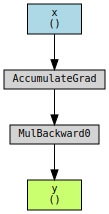

In [172]:
make_dot(y, params={"x": x, "y": y})

Our computation graph starts with `x` fed into `AccumulatedGrad` (which we will discuss later), that is fed into `MulBackward0` which was the `grad_fn` attached to tensor `y`.
`x` and `y` both have `()` underneath them specifying the shape of the tensors.

Let's calculate the derivative of our function by calling `y.backward()`

In [173]:
y.backward()

We know that the derivative of our function $\frac{dy}{dx} = \frac{d}{dx} 3x = 3$. Print out `x.grad` to validate that PyTorch is working correctly.

In [174]:
x.grad

tensor(3.)

What happens if we call `y.backward()` again?

In [175]:
# call y.backward() again
y.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

You should run into a `RuntimeError: Trying to backward through the graph a second time ...` because PyTorch frees up certain resources required to compute gradients once `.backward()` is called.
You can call `y.backward()` multiple times if you always specify `y.backward(retain_graph=True)`, but you should never do that in this class.
If you run into this error hereafter, you most likely made a mistake.

Let's compute the derivative of $y = 3x$ again.
This time compute `y = 3*x` first and then call `y.backward()`

In [176]:
y = 3*x
y.backward()

Now print out `x.grad`

In [177]:
print(x.grad)

tensor(6.)


**6?** Wasn't the derivative of $3x$ equal to 3? This occurred because PyTorch accumulates the gradients every time you call `.backward()`. Because `x.grad` was previously 3 and this new gradient is 3, then `x.grad` is now equal to 6.
This is what `AccumulatedGrad` meant on the computation graph.
To avoid your gradients from accumulating set `x.grad = None` (we call this zeroing out the gradients).

In [94]:
x.grad = None


Now set `y = 3*x`, call `y.backward()`, and print out `x.grad` and validate that it equals 3.

In [99]:
y=3*x
y.backward()
print(x.grad)

tensor(3.)


What about $x^2$? Set $y = x^2$, i.e. `y = x**2` and print out `y`.

In [103]:
y = x**2
print(y)


tensor(4., grad_fn=<PowBackward0>)


Because `x = 2` the output of $y = (2)^2 = 4$ and as before we have a `grad_fn=<PowBackward0>` attached to our tensor.

Now let's visualize the computation graph.

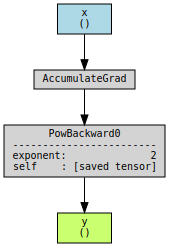

In [104]:
make_dot(y, params={"y": y, "x": x}, show_attrs=True)

We specified `show_attrs=True` this time and we see in `PowBackward0` the exponent that was used stored in the computation graph.

Let's calculate the derivative of of our function by calling `y.backward()` and don't forget to zero out your gradient first, i.e. `x.grad = None`.

In [106]:
x.grad = None
y.backward()

We know that the derivative of our function $\frac{dy}{dx} = \frac{d}{dx} x^2 = 2x = 2(2) = 4$, print out `x.grad` to validate.

In [107]:
print(x.grad)

tensor(4.)


Now let's calculate a multivariable derivative $a^2 (x+1)^2$.

Create a scalar tensor `a` with a value of 2 and a scalar tensor `x` with a value of 3.
Make sure both have `.requires_grad` set to `True`.

In [109]:
a = torch.tensor(2.0, requires_grad=True)
x = torch.tensor(3.0, requires_grad=True)


Now set $y = a^2(x+1)^2$ and print out `y`. Validate that $y = a^2(x+1)^2 = (2)^2 * ((3) + 1)^2 = 4 * 4^2 = 64$.

In [117]:
y = a**2 * (x+1)**2
print(y)


tensor(64., grad_fn=<MulBackward0>)


Now let's look at the computation graph.

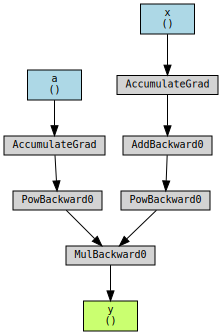

In [127]:
make_dot(y, params={"a": a, "x": x, "y": y})

Now call `y.backward()` and validate that

$\frac{dy}{dx} = \frac{d}{dx} a^2(x+1)^2 = 2a^2(x+1) = 2(2)^2(3 + 1) = 32$

$\frac{dy}{da} = \frac{d}{da} a^2(x+1)^2 = 2a(x+1)^2 = 2(2)(3 + 1)^2 = 64$

by printing `x.grad` and `a.grad`

In [135]:
a = torch.tensor(2.0, requires_grad=True)
x = torch.tensor(3.0, requires_grad=True)


y = a**2 * (x + 1)**2

y.backward()


print(x.grad)
print(a.grad)

tensor(32.)
tensor(64.)


Hopefully, it is clear that there all all kinds of functions you could put in that can be differentiated by PyTorch.
Let's now work with vector and matrix differentiation.

Define two new tensors:
- `A` with data `[[0, 1, 2], [3, 4, 5]]` with `requires_grad = True`
- `x` with data `[-1, 0, 1]` with `requires_grad = True`

In [138]:
A = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]], requires_grad=True)
x = torch.tensor([-1.0, 0.0, 1.0], requires_grad=True)

Now set $y = (Ax)^2$ and print out `y`. Validate that the output $y = (Ax)^2 = \left( \begin{bmatrix} 0 & 1 & 2 \\ 3 & 4 & 5 \end{bmatrix} \begin{bmatrix} -1 \\ 0 \\ 1 \end{bmatrix} \right)^2 = \left( \begin{bmatrix} 2 \\ 2 \end{bmatrix} \right)^2 = \begin{bmatrix} 2^2 \\ 2^2 \end{bmatrix} = \begin{bmatrix} 4 \\ 4 \end{bmatrix}$

In [141]:
y = (A@x)**2
print(y)

tensor([4., 4.], grad_fn=<PowBackward0>)


Now the "derivative" we are computing here is called the Jacobian, because $y$ is a vector-valued function. The Jacobian contains the derivative of every output, $y_i$, with respect to every input, $x_j$. Therefore, the Jacobian of $y$ with respect to $x$ is:

$\begin{aligned}
J_y = \begin{bmatrix} \frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} & \frac{\partial y_1}{\partial x_3} \\ \frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} & \frac{\partial y_2}{\partial x_3} \end{bmatrix} = \frac{\partial y}{\partial x} &= \frac{\partial}{\partial x} \left( \begin{bmatrix} A_{11} & A_{12} & A_{13} \\ A_{21} & A_{22} & A_{23} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} \right)^2 \\
    &= \frac{\partial}{\partial x} \left( \begin{bmatrix} A_{11}x_1 + A_{12}x_2 + A_{13}x_3 \\ A_{21}x_1 + A_{22}x_2 + A_{23}x_3 \end{bmatrix} \right)^2 \\
    &= \frac{\partial}{\partial x} \begin{bmatrix} (A_{11}x_1 + A_{12}x_2 + A_{13}x_3)^2 \\ (A_{21}x_1 + A_{22}x_2 + A_{23}x_3)^2 \end{bmatrix} \\
    &= \begin{bmatrix} \frac{\partial}{\partial x} (A_{11}x_1 + A_{12}x_2 + A_{13}x_3)^2 \\ \frac{\partial}{\partial x} (A_{21}x_1 + A_{22}x_2 + A_{23}x_3)^2 \end{bmatrix} \\
    &= \begin{bmatrix} \frac{\partial}{\partial x_1} (A_{11}x_1 + A_{12}x_2 + A_{13}x_3)^2 & \frac{\partial}{\partial x_2} (A_{11}x_1 + A_{12}x_2 + A_{13}x_3)^2 & \frac{\partial}{\partial x_3} (A_{11}x_1 + A_{12}x_2 + A_{13}x_3)^2  \\ \frac{\partial}{\partial x_1} (A_{21}x_1 + A_{22}x_2 + A_{23}x_3)^2 & \frac{\partial}{\partial x_2} (A_{21}x_1 + A_{22}x_2 + A_{23}x_3)^2 & \frac{\partial}{\partial x_3} (A_{21}x_1 + A_{22}x_2 + A_{23}x_3)^2 \end{bmatrix} \\
    &= \begin{bmatrix} 2A_{11}(A_{11}x_1 + A_{12}x_2 + A_{13}x_3) & 2A_{12}(A_{11}x_1 + A_{12}x_2 + A_{13}x_3) & 2A_{13}(A_{11}x_1 + A_{12}x_2 + A_{13}x_3)  \\ 2A_{21}(A_{21}x_1 + A_{22}x_2 + A_{23}x_3) & 2A_{22}(A_{21}x_1 + A_{22}x_2 + A_{23}x_3) & 2A_{23}(A_{21}x_1 + A_{22}x_2 + A_{23}x_3) \end{bmatrix} \\
    &= \begin{bmatrix} 0 & 4 & 8  \\ 12 & 16 & 20 \end{bmatrix}
\end{aligned}$

Now call `y.backward()`.

In [144]:
y.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

You should run into `RuntimeError: grad can be implicitly created only for scalar outputs`.
We can only call `.backward()` on scalar tensors in pytorch; there are some detailed explanations on why online, but simple reason behind this is because backpropagating on a scalar reduces the dimensionality of our gradients making backpropagation cheaper and quicker.
Which makes sense because `x` is a vector and the Jacobian we calculated is a matrix.

We can easily circumvent this issue by summing up our `y` tensor. Set `y_sum = torch.sum(y)` and call `.backward()` on `y_sum`.

In [146]:
y_sum = torch.sum(y)
y_sum.backward()

Now let's look at the gradients from our new function.

$\begin{aligned}
\frac{\partial y}{\partial x} &= \frac{\partial}{\partial x} \sum \left( \begin{bmatrix} A_{11} & A_{12} & A_{13} \\ A_{21} & A_{22} & A_{23} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} \right)^2 \\
    &= \sum \frac{\partial}{\partial x} \left( \begin{bmatrix} A_{11} & A_{12} & A_{13} \\ A_{21} & A_{22} & A_{23} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} \right)^2 \\
    &= \sum \frac{\partial}{\partial x} \left( \begin{bmatrix} A_{11}x_1 + A_{12}x_2 + A_{13}x_3 \\ A_{21}x_1 + A_{22}x_2 + A_{23}x_3 \end{bmatrix} \right)^2 \\
    & \quad \quad \vdots \\
    &= \sum \begin{bmatrix} 2A_{11}(A_{11}x_1 + A_{12}x_2 + A_{13}x_3) & 2A_{12}(A_{11}x_1 + A_{12}x_2 + A_{13}x_3) & 2A_{13}(A_{11}x_1 + A_{12}x_2 + A_{13}x_3)  \\ 2A_{21}(A_{21}x_1 + A_{22}x_2 + A_{23}x_3) & 2A_{22}(A_{21}x_1 + A_{22}x_2 + A_{23}x_3) & 2A_{23}(A_{21}x_1 + A_{22}x_2 + A_{23}x_3) \end{bmatrix} \\
    &= \sum \begin{bmatrix} 0 & 4 & 8  \\ 12 & 16 & 20 \end{bmatrix} \\
    &= \begin{bmatrix} 12 & 20 & 28  \end{bmatrix} \\
\end{aligned}$

**Note that by summing the output of `y` we ended up summing our Jacobian**.

I will quickly show $\frac{\partial y}{\partial A}$ in abbreviated form:

$\begin{aligned}
\frac{\partial y}{\partial A} &= \frac{\partial}{\partial x} \sum \left( Ax \right)^2 \\
    &= \frac{\partial}{\partial A}  (A_1x)^2 + (A_2x)^2 \\
    &= \begin{bmatrix} \frac{\partial}{\partial A_1} (A_1x)^2 + (A_2x)^2 \\ \frac{\partial}{\partial A_2} (A_1x)^2 + (A_2x)^2  \end{bmatrix} \\
    &= \begin{bmatrix} 2(A_1x)x^T \\ 2(A_2x)x^T  \end{bmatrix} \\
    &= \begin{bmatrix} 4x^T \\ 4x^T  \end{bmatrix} \\
    &= \begin{bmatrix} -4 & 0 & 4 \\ -4 & 0 & 4  \end{bmatrix} \\
\end{aligned}$

Print out `x.grad` and `A.grad` and validate you got the correct answer.

In [147]:
print(x.grad)
print(A.grad)

tensor([12., 20., 28.])
tensor([[-4.,  0.,  4.],
        [-4.,  0.,  4.]])


And just for fun, let's look at the computation graph.

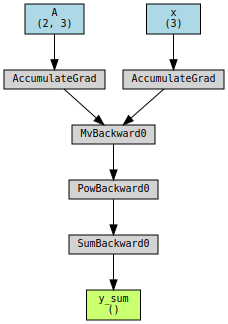

In [148]:
make_dot(y_sum, params={"A": A, "x": x, "y_sum": y_sum})

## Final Notes about Autodiff

There are two other functions that are useful when using autodifferentiation: `.clone()` and `.detach()`.

- `.clone()` gives us the ability to copy a tensor and remain on the computation graph.
- `.detach()` gives us the ability to copy a tensor, but to become detached from computation graph, i.e. the copy will have `requires_grad = False`.

To illustrate this we will initialize two tensors: $x=1$ and $y=2$

In [179]:
x = torch.tensor(1).float()
y = torch.tensor(2).float()

x.requires_grad = True
y.requires_grad = True

And vizualize the computation graph of:
```python
z = x + y
l = 2*z + 3*z
```

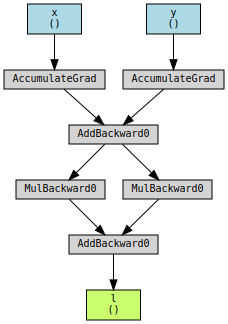

In [204]:
z = x + y
l = 2*z + 3*z

make_dot(l, params={"x": x, "y": y, "l": l})

The output of `l` is $l = 2z + 3z = 5(x + y) = 15$.
The gradients of $x$ and $y$ are then $\frac{d}{dx} 5(x+y) = \frac{d}{dx} 5x = 5$ and $\frac{d}{dy} 5(x+y) = \frac{d}{dy} 5y = 5$. Take the derivative of `l` and print out `l` and the gradients of `x` and `y` to validate this is true.

In [205]:
x.grad = None
y.grad = None
l.backward()
print(l)
print(x.grad)
print(y.grad)


tensor(15., grad_fn=<AddBackward0>)
tensor(5.)
tensor(5.)


### `.clone()`



Now compute the same function, but this time let `l = 2*z + 3*z.clone()`. Call `make_dot()` and visualize the computation graph.

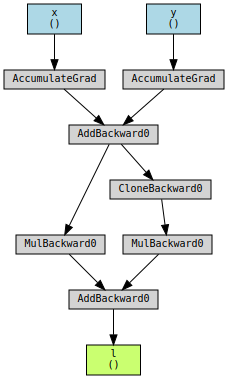

In [206]:
# compute z and l
l = 2*z + 3*z.clone()
make_dot(l, params={"x": x, "y": y, "l": l})

The computation graph now has `CloneBackward0` attached to, but since `.clone()` doesn't change any gradients then the output of `l` and `x.grad` and `y.grad` should all be the same as above.
Take the derivative of `l` (don't forget to zero out the gradients of `x` and `y`) and print out `l` and the gradients of `x` and `y` to validate this is true.

In [207]:
l.backward()
print(l, x.grad, y.grad)


tensor(15., grad_fn=<AddBackward0>) tensor(10.) tensor(10.)


### `.detach()`



Once again compute the same function, but this time let `l = 2*z + 3*z.detach()`. Call `make_dot()` and visualize the computation graph.

tensor(15., grad_fn=<AddBackward0>)


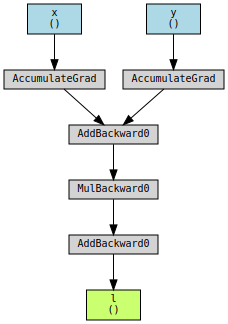

In [208]:
# compute z and l
l = 2*z + 3*z.detach()
print(l)

make_dot(l, params={"x": x, "y": y, "l": l})

The computation graph has changed because `3*z.detach()` looks like the number 9 to the compuation graph.
The output has not changed though, $l = 2z + 9 = 2(x + y) + 9 = 6 + 9 = 15$. However, our gradients are changed because $\frac{d}{dx} 2(x+y) + 9 = \frac{d}{dx} 2x = 2$ and $\frac{d}{dy} 2(x+y) + 9= \frac{d}{dy} 2y = 2$.
Take the derivative of `l` (don't forget to zero out the gradients of `x` and `y`) and print out `l` and the gradients of `x` and `y` to validate this is true.

In [209]:
x.grad.zero_()
y.grad.zero_()
l.backward()
print(l,x.grad,y.grad)


tensor(15., grad_fn=<AddBackward0>) tensor(2.) tensor(2.)


---

# Gradient Descent Learning

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as animation
from typing import List

Why do we care about using PyTorch's autodiff functionality?
Because it can be utilized for optimization.
Assume for example, we have $n$ data points and we want to find a line that best fits the data, differentiation can tell us how to find the best fitting line through gradient descent.

First let's create a Random Number Generator (RNG) to make sure our experiment is reproducible

In [211]:
rng = np.random.default_rng(42)

And now let's generate our data.
The true slope to our line is $m=.3$ and the our true intercept is $b=.25$.
Our data is 9 data points along this line with some added noise.

In [212]:
true_m = .3
true_b = .25
x_data = np.linspace(.1, .9, 9)
noise = rng.normal(0, 1, size=x_data.shape) * .1
y_data = true_m*x_data + true_b + noise

Below are some helper functions.
You don't need to look at them, just execute the cell below and move on.

In [213]:
def _add_true_fn_and_data(ax, handles, labels):
    ax.set_xlim(-.05, 1.05)
    ax.set_ylim(-.05, 1.05)
    ax.set_xlabel(r"x")
    ax.set_ylabel(r"y")
    ax.set_title("Input/Output Plot")
    # Plot data
    ax.scatter(x_data, y_data)
    # Plot true function
    xs = np.linspace(0, 1, 100)
    true_ys = true_m*xs + true_b
    handle, = ax.plot(xs, true_ys, label="true fn")
    handles.append(handle)
    labels.append("true fn")


def _add_pred_fn_and_errors(pred_m, pred_b, ax, handles, labels):
    xs = np.linspace(0, 1, 100)
    pred_ys = pred_m * xs + pred_b
    pred_line, = ax.plot(xs, pred_ys, label="pred fn")
    handles.append(pred_line)
    labels.append("pred fn")

    pred_y = pred_m * x_data + pred_b
    errors = pred_y - y_data
    error_lines = []
    for x_i, y_i, error in zip(x_data, y_data, errors):
        error_line, = ax.plot([x_i, x_i], [y_i, y_i + error], c="red", label="error")
        error_lines.append(error_line)
    handles.append(error_line)
    labels.append("error")
    return pred_line, error_lines


def _add_loss_surface(ax, m_min=-1, m_max=1.5, b_min=-.4, b_max=.9):
    steps = 50
    m_space = np.linspace(m_min, m_max, steps)
    b_space = np.linspace(b_min, b_max, steps)

    MM, BB = np.meshgrid(m_space, b_space, indexing="ij")
    MM = MM.reshape(steps * steps)
    BB = BB.reshape(steps * steps)

    YY = MM[:, None] @ x_data[None, :] + BB[:, None]
    EE = YY - y_data[None, :]
    EE = np.mean(EE**2, axis=1)

    MM = MM.reshape(steps, steps)
    BB = BB.reshape(steps, steps)
    EE = EE.reshape(steps, steps)

    ax.contourf(MM, BB, np.log2(EE))
    ax.set_title("Loss Surface")
    ax.set_xlabel("slope " + r"($m$)")
    ax.set_ylabel("intercept " + r"($b$)")


def plot_data(pred_m=None, pred_b=None, figsize=(6, 6)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    handles = []
    labels = []

    _add_true_fn_and_data(ax=ax, handles=handles, labels=labels)

    # Plot predicted function
    if pred_m is not None or pred_b is not None:
        if pred_m is None:
            pred_m = 0
        if pred_b is None:
            pred_b = 0
        _add_pred_fn_and_errors(pred_m=pred_m, pred_b=pred_b, ax=ax, handles=handles, labels=labels)

    ax.legend(handles, labels)
    plt.show()


def plot_1d_loss_surface(pred_ms=None, pred_bs=None, figsize=(12, 6)):
    if pred_ms is None and pred_bs is None:
        raise ValueError(f"Expected pred_ms or pred_bs to be not None")
    if pred_ms is not None and pred_bs is not None:
        print(f"Both pred_ms and pred_bs are not None and function will default to using pred_ms")

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    handles = []
    labels = []

    ### Input Output ###
    inp_out_ax = axes[0]
    _add_true_fn_and_data(ax=inp_out_ax, handles=handles, labels=labels)

    # Plot predicted function
    pred_vars = None
    if pred_ms is not None:
        pred_ms = np.array(pred_ms)
        pred_ms = np.concatenate((pred_ms, pred_ms[::-1]))
        pred_bs = np.zeros_like(pred_ms)
        loss_title = "Loss Surface With Respect To Slope"
        loss_xlabel = "slope"
        pred_vars = pred_ms
    else:
        pred_bs = np.array(pred_bs)
        pred_bs = np.concatenate((pred_bs, pred_bs[::-1]))
        pred_ms = np.zeros_like(pred_bs)
        loss_title = "Loss Surface With Respect To Intercept"
        loss_xlabel = "intercept"
        pred_vars = pred_bs

    pred_line, error_lines = _add_pred_fn_and_errors(pred_m=pred_ms[0], pred_b=pred_bs[0], ax=inp_out_ax, handles=handles, labels=labels)

    inp_out_ax.legend(handles, labels)

    ### 1D Loss Surface ###
    loss_ax = axes[1]

    pred_ys = x_data[:, None] @ pred_ms[None, :] + pred_bs
    sses = np.sum((y_data[:, None] - pred_ys)**2, axis=0)

    loss_ax.plot(pred_vars[:len(pred_vars)//2], sses[:len(sses)//2])

    loss_scatter = loss_ax.scatter(pred_vars[0:1], sses[0:1])

    loss_ax.set_title(loss_title)
    loss_ax.set_xlabel(loss_xlabel)
    loss_ax.set_ylabel("Sum Square Error")

    xs = np.linspace(0, 1, 100)
    def update(frame):
        # for each frame, update the data stored on each artist.
        pred_m = pred_ms[frame]
        pred_b = pred_bs[frame]
        pred_ys = pred_m * xs + pred_b

        pred_line.set_ydata(pred_ys)

        pred_y = pred_m * x_data + pred_b
        errors = pred_y - y_data

        for error_line, y_i, error in zip(error_lines, y_data, errors):
            error_line.set_ydata([y_i, y_i + error])

        loss_scatter.set_offsets(np.array([pred_vars[frame], sses[frame]]))

        return (pred_line, *error_lines, loss_scatter)

    anim = animation.FuncAnimation(fig=fig, func=update, frames=len(pred_ms), interval=50, blit=True)
    from IPython.display import HTML
    anim = HTML(anim.to_html5_video())
    plt.close('all')
    del fig
    return anim


def plot_2d_loss_surface():
    def fan_linspace(start, diff, step, fan_up=True):
        quarter_step = step//4
        offset = diff
        if not fan_up:
            offset = -diff
        return np.concatenate([np.linspace(start, start+offset, quarter_step),
                            np.linspace(start+offset, start, quarter_step),
                            np.linspace(start, start-offset, quarter_step),
                            np.linspace(start-offset, start, quarter_step)])

    sim_steps = 50
    anim_pred_ms = np.concatenate([np.full(sim_steps, true_m), fan_linspace(true_m, true_m*2, sim_steps), (true_m - .5 + np.cos(np.linspace(0, 2*np.pi, sim_steps)) / 2).tolist(), (true_m + .5 + np.cos(np.linspace(np.pi, 3*np.pi, sim_steps)) / 2).tolist()])[:, None]
    anim_pred_bs = np.concatenate([fan_linspace(true_b, true_b*2, sim_steps), np.full(sim_steps, true_b), (true_b + np.sin(np.linspace(0, 2*np.pi, sim_steps)) / 2).tolist(), (true_b + np.sin(np.linspace(0, 2*np.pi, sim_steps)) / 2).tolist()])[:, None]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    handles = []
    labels = []

    ### Input Output ###
    inp_out_ax = axes[0]
    _add_true_fn_and_data(inp_out_ax, handles, labels)
    pred_line, error_lines = _add_pred_fn_and_errors(anim_pred_ms[0], anim_pred_bs[0], inp_out_ax, handles, labels)
    inp_out_ax.set_xlim(-.2, 1.2)
    inp_out_ax.set_ylim(-.2, 1.2)
    inp_out_ax.legend(handles, labels)

    ### Loss Surface ###
    loss_ax = axes[1]
    _add_loss_surface(loss_ax)
    loss_scatter = loss_ax.scatter(anim_pred_ms[0:1], anim_pred_bs[0:1], c="orange")

    xs = np.linspace(0, 1, 100)
    def update(frame):
        # for each frame, update the data stored on each artist.
        pred_m = anim_pred_ms[frame]
        pred_b = anim_pred_bs[frame]
        pred_ys = pred_m * xs + pred_b

        pred_line.set_ydata(pred_ys)

        pred_y = pred_m * x_data + pred_b
        errors = pred_y - y_data

        for error_line, y_i, error in zip(error_lines, y_data, errors):
            error_line.set_ydata([y_i, y_i + error])

        loss_scatter.set_offsets(np.concatenate([anim_pred_ms[frame], anim_pred_bs[frame]]))

        return (pred_line, *error_lines, loss_scatter)


    anim = animation.FuncAnimation(fig=fig, func=update, frames=len(anim_pred_ms), interval=45, blit=True)
    from IPython.display import HTML
    anim = HTML(anim.to_html5_video())
    plt.close('all')
    del fig
    return anim

def plot_slope_grad(m: torch.Tensor | List[torch.Tensor], grad: torch.Tensor | List[torch.Tensor] | None, learning_rate: float = 1., figsize=(4, 3)):
    fig, ax = plt.subplots(figsize=figsize)
    # Plot loss surface
    xs = np.linspace(-1.2, 2.5, 100)
    y_hat = x_data[:, None] @ xs[None, :]
    sses = np.sum((y_hat - y_data[:, None])**2, axis=0)
    ax.plot(xs, sses)

    # Plot gradient
    if isinstance(m, torch.Tensor):
        m = [m]
    handle = None
    for i in range(len(m)):
        loss = np.sum((x_data * m[i].item() - y_data)**2)
        ax.scatter(x=[m[i].item()], y=[loss], color='r')
        if grad is not None:
            if grad[i] is None:
                continue
            handle = ax.arrow(x=m[i].item(), y=loss, dx=grad[i].item() * learning_rate, dy=0, head_width=0.2, head_length=0.1, width=0.01, color='r', length_includes_head=True, label="gradient")

    if handle is not None:
        ax.legend([handle], ["gradient"])

    ax.set_xlabel("slope " + r"($m$)")
    ax.set_ylabel("SSE Loss")

    plt.show()


def plot_grad(m: torch.Tensor | List[torch.Tensor],
              b: torch.Tensor | List[torch.Tensor],
              m_grad: torch.Tensor | List[torch.Tensor] | None,
              b_grad: torch.Tensor | List[torch.Tensor] | None,
              learning_rate: float = 1., figsize=(4, 4)):
    fig, ax = plt.subplots(figsize=figsize)
    _add_loss_surface(ax, m_min=-3, m_max=3, b_min=-3, b_max=3)

    if isinstance(m, torch.Tensor):
        m = [m]
        m_grad = [m_grad]
        b = [b]
        b_grad = [b_grad]

    handle = None
    for i in range(len(m)):
        ax.scatter(x=[m[i].item()], y=[b[i].item()], color='r')
        if m_grad is not None:
            if m_grad[i] is None:
                continue
            handle = ax.arrow(x=m[i].item(), y=b[i].item(), dx=m_grad[i].item() * learning_rate, dy=b_grad[i].item() * learning_rate,
                              head_width=0.2, head_length=0.1, width=0.01, color='r', length_includes_head=True, label="gradient")

    if handle is not None:
        ax.legend([handle], ["gradient"])

    ax.set_xlabel("slope " + r"($m$)")
    ax.set_ylabel("intercept " + r"($b$)")

Now that we have generated our data, call `plot_data()` so we can see what it looks like, you don't have to pass in any arguments.

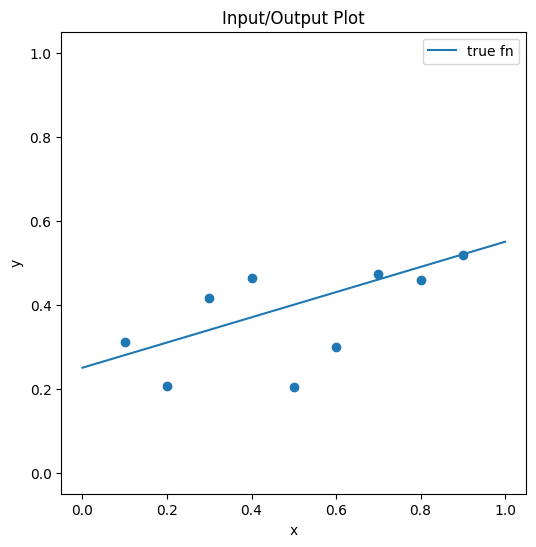

In [214]:
plot_data()

Now call `plot_data()`, but this time pass in a prediction for the slope (e.g.
`pred_m=0.5`) and intercept (e.g. `pred_b=0.1`).

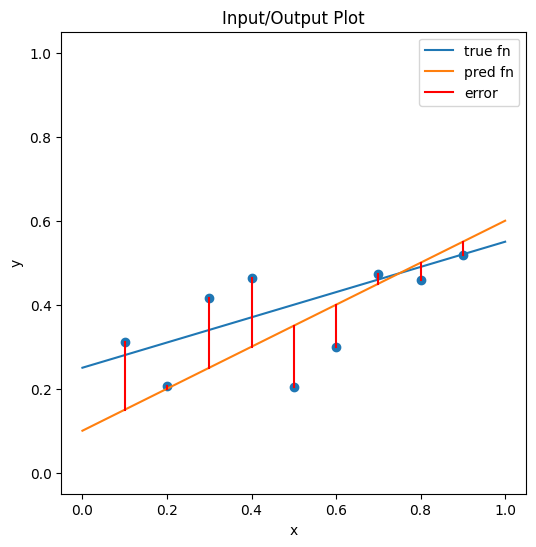

In [216]:
plot_data(pred_m=0.5,pred_b=0.1)

The errors $e$ are computed by looking at the difference between the true data $y$ and our predictions $\hat{y}$, i.e. $e = y - \hat{y}$.
Now if we squared our errors and then took their sum, i.e compute the sum squared error (SSE), $\sum (y - \hat{y})^2$ then we get a single value, which we call the loss, that tells us how good our prediction function fits the data.

Furthermore, if we moved the predicted slope around we could see how different slopes compare to each either through the loss.
To visualize this look execute the cell below.

In [217]:
plot_1d_loss_surface(pred_ms=np.linspace(0, 1, 40))

If we are trying to find the slope that will minimize our loss, we can use the gradient to tell is which direction we need to move in order to optimize our objective.
First, we are going to convert `x_data` and `y_data` from numpy arrays into tensors.

In [218]:
x = torch.from_numpy(x_data).float().unsqueeze(1)
y = torch.from_numpy(y_data).float().unsqueeze(1)

Now create two functions: `forward()` and `sse_loss()`.

The `forward()` function does forward propagation.
We apply the slope formula $m \times x+b$, but we need to vectorize it. Dimension 0 of `x` is the "batch" dimension: it separates the 9 individual points. Dimension 1 of `x` is the "channel" dimension which contains a single channel of data (since the input is a point in 1D space). To get our y predictions, we perform the same function on each batch instance: so we need to matrix-multiply our slope `m` across dimension 1 of `x`. Our model's prediction is:

$\hat{y} = xm + b$

where `x.shape==[9,1]`, `m.shape==[1,1]`, `b.shape=[1]`.

This ensures that the output `y_hat.shape==[9,1]`: we predict one y-value per point.

In [233]:
def forward(m, b, x):
    # implement forward and return xm^T + b
    return x@m.T + b


The `sse_loss()` function takes your predictions `y_hat` and compares it to the true output `y`, by computing the sum of the squared errors.

In [234]:
def sse_loss(y_hat, y):
    # return the sse loss
    return sum((y_hat - y)**2)


Execute the cell below to validate your `forward()` and `sse_loss()` work correctly.

In [235]:
m = torch.tensor([[2.]])
b = torch.tensor([[0.]])
y_hat = forward(m, b, x)
loss = sse_loss(y_hat, y)
assert torch.allclose(loss, torch.tensor(5.4452))

m = torch.tensor([[1.]])
b = torch.tensor([[1.]])
y_hat = forward(m, b, x)
loss = sse_loss(y_hat, y)
assert torch.allclose(loss, torch.tensor(11.8534))

We will now analyze what the gradients tell us.
At the moment we will only focus on a single parameter: the slope `m`.
Go ahead and execute the cell below.

In [236]:
m = torch.tensor([[2.]]).float()
b = torch.tensor([[0]]).float()
m.requires_grad = True
b.requires_grad = False

Now use your `forward()` and `sse_loss()` functions to get the SSE loss for `m` and `b` and then calculate the derivative of loss, i.e. call `loss.backward()`.

In [237]:
y_hat = forward(m, b, x)
loss = sse_loss(y_hat, y)
loss.backward()

Execute the cell below and validate you calculated the correct gradient.

In [238]:
assert torch.allclose(m.grad, torch.tensor(7.7423))

Now call the `plot_slope_grad()` function below to visualize what the gradient is pointing towards.

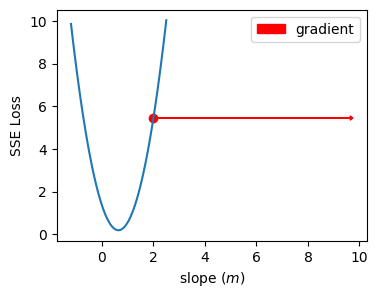

In [240]:
# execute this cell
plot_slope_grad(m, m.grad)

Notice how the gradient points towards away from the minimal point, this is because gradients point towards "steepest ascent" (which will become more apparent when we work with 2d loss surfaces).
To move towards the the minimal point we therefore need to move in the opposite direction, i.e. `-x.grad`.
Create the same plot, but point the gradient in the opposite direction.

Now we are pointing in the right direction, but as you can see the gradient, $\nabla m$, is telling our slope, $m$, to become $m \approx -6$, which clearly overshoots the minimal point.
Therefore let's apply a learning rate, $\alpha$, to our gradient.
Call `plot_slope_grad()` one more time, but this time pass in the argument `learning_rate=.05`.

Now we are pointing in the right direction and with an acceptable magnitude (this learning rate is perhaps a little too small, but it is useful for our other visualizations).
Now let's update our slope by apply the gradient, i.e. $m \leftarrow m - \alpha \nabla m$.
First print out `m - .05 * m.grad` below.

In [ ]:
# execute this cell
m - .05 * m.grad

You will notice this contains a `grad_fn` which means this operation was put on the computation graph because `m` is a tensor that requires gradients.
We do not want to calculate gradients on our update step since we aren't doing meta-learning.

Instead you should update `m` by accessing its `.data` variable and setting `m.data = m.data - .05 * m.grad.data`

Now that we have updated our slope, call `plot_slope_grad()` below.

In [ ]:
# execute this cell
plot_slope_grad(m, None)

We have take a step closer towards minimizing our loss, which means that our slope is beginning to fit our data better.

Let's see how this function will operate for many timesteps.
Follow the directions below and implement the `slope_optimization_step()` function.

In [ ]:
def slope_optimization_step(m: torch.Tensor, b, x, y, learning_rate):
    # zero out your gradient
    pass
    # call your forward function
    pass
    # compute sse loss
    pass
    # call backward
    pass
    # apply your gradient and don't forget to use the learning_rate
    pass

We will now use your `optimization_step` function to plot multiple optimization steps. Execute the cell below.

In [ ]:
def plot_slope_optimization_steps(m, b, x, y, learning_rate, steps=4):
    ms = [m.clone()]
    grads = []
    for _ in range(steps):
        slope_optimization_step(m, b, x, y, learning_rate)
        ms.append(m.clone())
        grads.append(-m.grad.clone())

    grads.append(None)
    plot_slope_grad(ms, grads, learning_rate)

m = torch.tensor([[2.5]]).float()
b = torch.tensor([[0]]).float()
m.requires_grad = True
b.requires_grad = False

plot_slope_optimization_steps(m, b, x, y, learning_rate=.05, steps=4)

Now if we had a smaller learning rate ($\alpha = .02$), it will take us more gradient steps to solve the problem. Execute the cell below to see.

In [ ]:
m = torch.tensor([[2.5]]).float()
m.requires_grad = True

plot_slope_optimization_steps(m, b, x, y, learning_rate=.02, steps=8)

But if our learning rate is too large ($\alpha = .42$), then the parameter will bounce away from the minimal point. Execute the cell below to see. *Note that $m$ starts at 1 in this case*.

In [ ]:
m = torch.tensor([[1]]).float()
m.requires_grad = True

plot_slope_optimization_steps(m, b, x, y, learning_rate=.42, steps=4)

Now let's work with on optimizing the slope $m$ and intercept $b$.
Execute the cell below to see what the gradient tells us about $m$ and $b$.

In [ ]:
m = torch.tensor([[2.]]).float()
b = torch.tensor([[1]]).float()
m.requires_grad = True
b.requires_grad = True
y_hat = forward(m, b, x)
loss = sse_loss(y_hat, y)
loss.backward()
plot_grad(m, b, m.grad, b.grad, learning_rate=.02)

As stated before, the gradient points towards steepest ascent, and as you can imagine if we looked at the negative gradient it would point (indirectly) towards the minimal point of the loss.

Let's visualize what gradient descent looks like for multiple steps.
Follow the directions below and implement the `optimization_step()` function.

In [ ]:
def optimization_step(m: torch.Tensor, b: torch.Tensor, x, y, learning_rate):
    # zero out your gradients
    pass
    pass
    # call your forward function
    pass
    # compute sse loss
    pass
    # call backward
    pass
    # apply your gradients
    pass
    pass

We will now use your `optimization_step` function and plot what it looks like to perform multiple gradient descent steps.
You can set the argument `plot_grads=False` to make the plot less noisy.

In [ ]:
def plot_optimization_steps(m, b, x, y, learning_rate, steps=4, plot_grads=True, figsize=(8, 8)):
    ms = [m.clone()]
    bs = [b.clone()]
    m_grads = []
    b_grads = []
    for _ in range(steps):
        optimization_step(m, b, x, y, learning_rate)
        ms.append(m.clone())
        bs.append(b.clone())
        m_grads.append(-m.grad.clone())
        b_grads.append(-b.grad.clone())

    m_grads.append(None)
    b_grads.append(None)
    if plot_grads:
        plot_grad(ms, bs, m_grads, b_grads, learning_rate, figsize=figsize)
    else:
        plot_grad(ms, bs, None, None, learning_rate, figsize=figsize)

m = torch.tensor([[2.5]]).float()
b = torch.tensor([[2]]).float()
m.requires_grad = True
b.requires_grad = True

plot_optimization_steps(m, b, x, y, .02, steps=10, plot_grads=True)

After 10 optimization steps, we were not able to reach the minimal loss, so let's start over and optimize for 100 steps.

In [ ]:
m = torch.tensor([[2.5]]).float()
b = torch.tensor([[2]]).float()
m.requires_grad = True
b.requires_grad = True

plot_optimization_steps(m, b, x, y, .02, steps=100, plot_grads=False)

After 100 steps we are pretty close to reaching the optimal point.
For fun, go ahead and execute the code below, which performs 20 optimization steps with a larger learning rate.

In [ ]:
m = torch.tensor([[2.5]]).float()
b = torch.tensor([[2]]).float()
m.requires_grad = True
b.requires_grad = True

plot_optimization_steps(m, b, x, y, .085, steps=20, plot_grads=True)

It is interesting that the learning rate is a little too big for the intercept (not big enough for it to jump away from the minimal point though), but it is better for our slope, which converges faster than the previous examples.
In the future you will learn about optimizers that can handle this issue.

This process of gradient descent is the power house of deep learning.
We will usually not be able to visualize the optimization process in detail because once we scale up the number of parameters we are optimizing we lose our ability to visualize the loss surface, but this process still happens in that high-dimensional space.

---

# Lab Submission Information:

Colab stores the saved changes of your notebook on your Google Drive (NOT the file on your device). Remember to download your notebook as an .ipynb file to get your changes, and submit the downloaded file. The file should contain all the changes you've made, including code and output cells: if you can see it in Colab, it will be stored in the .ipynb file. If you download the file as .py, it will not contain the outputs.

Submit your .ipynb file online.